# Demo for time stepping algorithms using Coriolis turning

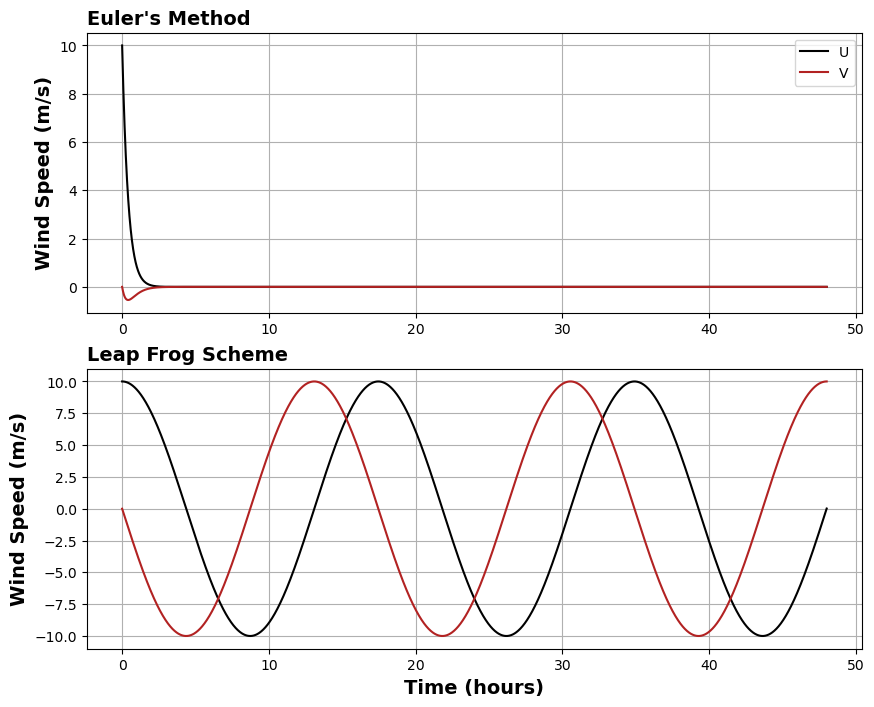

In [10]:
# Time controls
max_time = 48*3600.0 # max time in seconds
dt = 30 # time step (s)

# Coriolis parameter
f = 0.0001 # 1/s

# Initial values
u1 = [10] # m/s
v1 = [0] # m/s
t1 = [0] # s

# Solve with Euler's method
while t1[-1] < max_time:

    # Integrate
    new_u = (u1[-1] + f*v1[-1]*dt)*0.98
    new_v = (v1[-1] - f*u1[-1]*dt)*0.98

    # Save values
    u1.append(new_u)
    v1.append(new_v)

    t1.append(t1[-1]+dt)

# Solve with Leap-frog method
u2 = [u1[0]]
v2 = [v1[0]]
t2 = [t1[0]]

# First step with Eulers
new_u = u2[-1] + f*v2[-1]*dt
new_v = v2[-1] - f*u2[-1]*dt
u2.append(new_u)
v2.append(new_v)
t2.append(t2[-1]+dt)

# Now leap-frog
while t2[-1] < max_time:

    # Integrate
    new_u = u2[-2] + f*v2[-1]*2*dt
    new_v = v2[-2] - f*u2[-1]*2*dt

    # Save values
    u2.append(new_u)
    v2.append(new_v)

    t2.append(t2[-2]+2.0*dt)

# Plot
import matplotlib.pyplot as pp
import numpy as np
t1 = np.array(t1)/3600.0
t2 = np.array(t2)/3600.0

fig, (ax1, ax2) = pp.subplots(nrows=2, figsize=(10,8))

ax1.plot(t1, u1, color='black', label='U')
ax1.plot(t1, v1, color='firebrick', label='V')

ax2.plot(t2, u2, color='black', label='U')
ax2.plot(t2, v2, color='firebrick', label='V')

ax1.legend()
ax1.grid()
ax2.grid()

ax2.set_xlabel('Time (hours)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Wind Speed (m/s)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Wind Speed (m/s)', fontsize=14, fontweight='bold')

ax1.set_title("Euler's Method", fontsize=14, fontweight='bold', loc='left')
ax2.set_title("Leap Frog Scheme", fontsize=14, fontweight='bold', loc='left')

pp.show()

--------------------------------
# Advection Equation Demo
--------------------------------

In [1]:
# Import modules
import matplotlib.animation as ma
import matplotlib.pyplot as pp
import numpy as np
import time

In [2]:
# Settings
nx = 100   # Number of grid points
tmax = 100    # Number of time steps
dt = 10.0   # Time step
dx = 100.0  # Grid spacing
c = 10.0    # Wave speed
pdiff = 5.0     # Pressure perturbation
p0 = 1013.0 # Base pressure

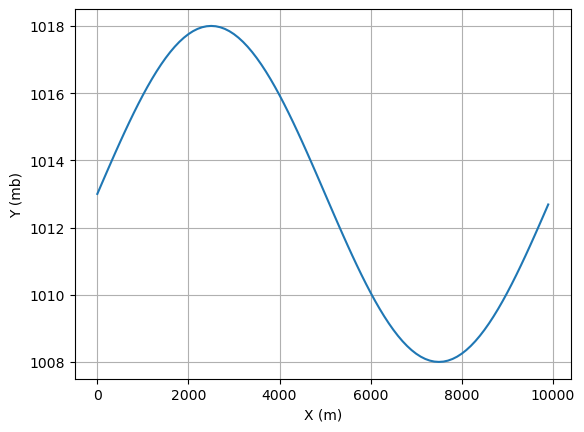

In [3]:
# Run the advection model
dp = 2*np.pi/nx
p = np.ones(nx)*pdiff*np.sin(np.arange(0,2*np.pi,dp))+p0

# Plot initial conditions
fig, ax = pp.subplots()
ax.plot(np.arange(0, nx)*dx, p)
ax.grid()
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (mb)')
pp.show()

In [ ]:
# More convenient settings
nx = 100   # Number of grid points
tmax = 1000    # Number of time steps
dt = 10.0   # Time step
dx = 100.0  # Grid spacing
c = -1.0    # Wave speed
pdiff = 5.0     # Pressure perturbation
p0 = 1013.0 # Base pressure
delay = 0.1 # Delay between animation frames (seconds)

###########################
# Run the advection model #
###########################

# Initialize arrays
p = np.ones(nx)*pdiff*np.sin(np.arange(0,2*np.pi,2*np.pi/nx))+p0
dp = np.ones(p.shape) # Pressure gradient
p_new = [p[:]] # Initial pressure array

# Create figure and axis for plotting
pp.rcParams["animation.html"] = "jshtml"
fig, ax = pp.subplots()

# Integrate
for t in range(tmax):
    
    # Compute the gradients (wrap-around boundary)
    dp[1:] = p_new[-1][1:]-p_new[-1][:-1]
    dp[0] = p_new[-1][0]-p_new[-1][-1]

    # Compute the next time step
    p_new.append(p_new[-1]-c*dt/dx*dp)

print(len(p_new))

# Create animation
def animate(t):

    pp.cla()
    pp.plot(np.arange(0, nx)*dx, p_new[t])
    ax.grid()
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (mb)')
    ax.set_ylim(1005, 1020)

ma.FuncAnimation(fig, animate, frames=len(p_new))


-----------------------
# Leap-frog Demo
-----------------------

101


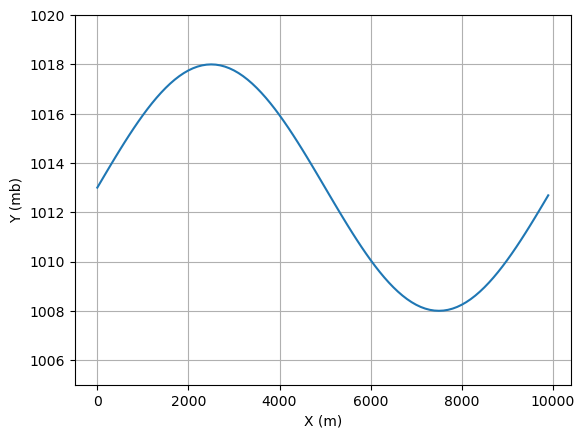

In [13]:
# More convenient settings
nx = 100   # Number of grid points
tmax = 100    # Number of time steps
dt = 10.0   # Time step
dx = 100.0  # Grid spacing
c = 10.0    # Wave speed
pdiff = 5.0     # Pressure perturbation
p0 = 1013.0 # Base pressure

###########################
# Run the advection model #
###########################

# Initialize arrays
p = np.ones(nx)*pdiff*np.sin(np.arange(0,2*np.pi,2*np.pi/nx))+p0
dp = np.ones(p.shape) # Pressure gradient
pres = [p[:]] # Initial pressure array

# Create figure and axis for plotting
pp.rcParams["animation.html"] = "jshtml"
fig, ax = pp.subplots()

# Integrate
# First time step Euler's
# Compute the gradients (wrap-around boundary)
dp[1:] = pres[-1][1:]-pres[-1][:-1]
dp[0] = pres[-1][0]-pres[-1][-1]

# Compute the next time step
pres.append(pres[-1]-c*dt/dx*dp)

# Then integrate with Leapfrog
# Pull out needed values for next integration
p_old = pres[-2]
p_now = pres[-1]
for t in range(1, tmax):
    
    # Compute the spatial gradients (wrap-around boundary)
    for i in range(p.size-1):
        dp[i] = p_now[i+1]-p_now[i-1]
    dp[-1] = p_now[1]-p_now[-2]
    p_new = p_old-c*dt/dx*dp
    
    # Compute the next time step
    pres.append(p_old-c*dt/dx*dp)

    # Cycle values
    p_old = p_now[:]
    p_now = p_new[:]

print(len(pres))

# Create animation
def animate(t):

    pp.cla()
    pp.plot(np.arange(0, nx)*dx, pres[t])
    ax.grid()
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (mb)')
    ax.set_ylim(1005, 1020)

ma.FuncAnimation(fig, animate, frames=len(p_new))

## Filtered leap frog

101


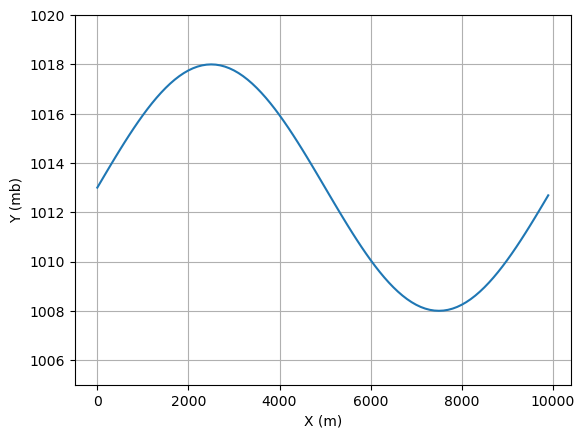

In [31]:
# More convenient settings
nx = 100   # Number of grid points
tmax = 100    # Number of time steps
dt = 5.0   # Time step
dx = 100.0  # Grid spacing
c = 10.0    # Wave speed
pdiff = 5.0     # Pressure perturbation
p0 = 1013.0 # Base pressure
gamma = 0.1

###########################
# Run the advection model #
###########################

# Initialize arrays
p = np.ones(nx)*pdiff*np.sin(np.arange(0,2*np.pi,2*np.pi/nx))+p0
dp = np.ones(p.shape) # Pressure gradient
pres = [p[:]] # Initial pressure array

# Create figure and axis for plotting
pp.rcParams["animation.html"] = "jshtml"
fig, ax = pp.subplots()

# Integrate
# First time step Euler's
# Compute the gradients (wrap-around boundary)
dp[1:] = pres[-1][1:]-pres[-1][:-1]
dp[0] = pres[-1][0]-pres[-1][-1]

# Compute the next time step
pres.append(pres[-1]-c*dt/dx*dp)

# Then integrate with Leapfrog
# Pull out needed values for next integration
p_old = pres[-2]
p_now = pres[-1]
for t in range(1, tmax):
    
    # Compute the spatial gradients (wrap-around boundary)
    for i in range(p.size-1):
        dp[i] = p_now[i+1]-p_now[i-1]
    dp[-1] = p_now[1]-p_now[-2]
    p_new = p_old-c*dt/dx*dp

    # Compute filtered "now" value
    p_filtered = p_now+gamma*(p_new-2.0*p_now+p_old)
    
    # Compute the next time step
    pres.append(p_new)
    
    # Cycle values
    p_old = p_filtered[:]
    p_now = p_new[:]

print(len(pres))

# Create animation
def animate(t):

    pp.cla()
    pp.plot(np.arange(0, nx)*dx, pres[t])
    ax.grid()
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (mb)')
    ax.set_ylim(1005, 1020)

ma.FuncAnimation(fig, animate, frames=len(pres))